In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

(array([ 56.,  90., 109., 120., 127., 123., 121., 109.,  89.,  56.]),
 array([-88.86156019, -71.10577795, -53.34999571, -35.59421347, -17.83843123,
         -0.08264899,  17.67313325,  35.42891549,  53.18469773,  70.94047997,
         88.69626221]),
 <a list of 10 Patch objects>)

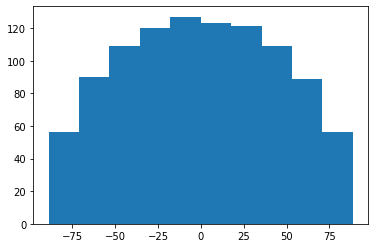

In [23]:
"1"
n = 1000
a = np . random . normal (0 , 1 , (n , n ))
A = a + a.T
plt.hist(np.linalg.eigvalsh(A))

In [24]:
"2"
n = 10
a = np.random.normal (0, 1, (n,n))
A = a @ a.T
eig1 = np.linalg.eigvalsh(A)
print(eig1)

[ 0.04071812  0.32588452  1.07357357  3.35082333  4.86218271  8.7556889  10.52248983
 14.10590731 18.21933922 39.62369334]


In [144]:
def norm(v):
    return np.sqrt(np.sum(v**2))
def householder(x):
    vec = np.array(x, dtype=float, copy = True)
    if vec.ndim != 1:
        raise ValueError("vec.ndim = %s, expected 1" % vec.ndim)
    v = np.zeros_like(vec)
    v[0] = norm(vec)
    
    if norm(vec) > 0:
        d = vec.copy()
        d[0] = -np.sum(vec[1:]**2) / (vec[0] + norm(vec))
        u = d / norm(d)
    else:
        u = (vec - v) / norm(vec - v)
    u = np.reshape(u, (1, x.shape[0])) 
    H = np.eye(vec.shape[0]) - 2 * u.T @ u

    return v, H


In [146]:
def qr_decomp(a):
    
    R = np.array(a, copy=True, dtype=float)
    _, n = R.shape
    Q = np.eye(n)
    
    for j in range(0, n - 2):
        H = np.eye(n)
        _, H_ = householder(R[j + 1:,j])
        H[j + 1:, j + 1:] = H_
        
        Q = Q @ H
        R = H @ R
        
    return Q, R

In [147]:
H0 = H@Q
for i in range(10000):
    q, r = np.linalg.qr(H)
    H = r @ q
    sum = 0
    for j in range(9):
        sum += H[j+1, j]
    if abs(sum) < 1e-3:
        break
print(H) 
print(eig1)

[[39.62369334  0.          0.         -0.         -0.         -0.
  -0.         -0.         -0.          0.        ]
 [ 0.         18.21933922 -0.00000258  0.         -0.         -0.
  -0.          0.         -0.         -0.        ]
 [ 0.         -0.00000258 14.10590731  0.00002019  0.          0.
   0.         -0.          0.         -0.        ]
 [ 0.          0.          0.00002019 10.52248967 -0.0005342   0.
  -0.         -0.          0.          0.        ]
 [ 0.          0.          0.         -0.0005342   8.75568906  0.
   0.          0.         -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          4.86218271
  -0.00000014 -0.          0.         -0.        ]
 [ 0.          0.          0.          0.          0.         -0.00000014
   3.35082333  0.         -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.          1.07357357  0.          0.        ]
 [ 0.          0.          0.          0.       

In [154]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "43.jpg")

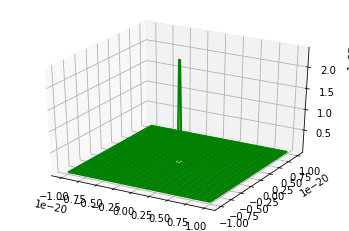

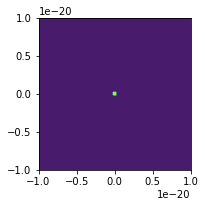

In [38]:
"3"
A =np.array([[0,1],[1,0]])
eps1=0.1
eps2=0.01
import math
def f(x, y):
    a = x**2 + y ** 2
    return np.sqrt((1 + 2*(a ** 2) + np.sqrt(4* (a **2) + 1))/(2 * (a ** 4)))
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1e-20, 1e-20, 100)
y = np.linspace(-1e-20, 1e-20, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)   
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')

fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2, aspect='equal')
ax2.contourf(X, Y, Z)

plt.show()

In [155]:
Image(url= "432.jpg")

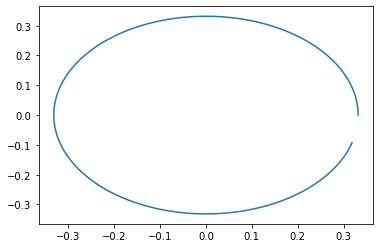

In [39]:
x = lambda a: np.cos(a)   # e = 0.1
y = lambda a: np.sin(a)
fig = plt.subplots()
a = np.linspace(0, 2 * 3,141592 ,100)
plt.plot((np.sqrt(11)/10) * x(a), (np.sqrt(11)/10) * y(a))
plt.show()

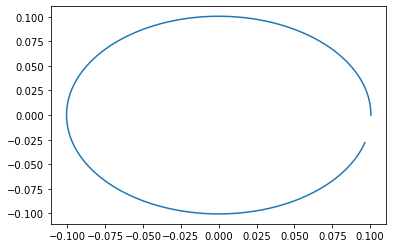

In [40]:
fig = plt.subplots()   # e = 0.01
plt.plot((np.sqrt(101)/100) * x(a), (np.sqrt(101)/100) * y(a))
plt.show()

In [156]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "45.jpg")

In [157]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "452.jpg")

In [128]:
"5"
N=1000
mM=0.5
A = np.zeros((2*N,2*N))
for i in range(0,2*N-1):
    A[i+1,i]=-1
for i in range(0,2*N):
    A[i,i]=2
for i in range(0,2*N-2):
    A[i+1,i+2]=-1
for i in range(0,N):
    A[2*i+1,2*i]=A[2*i+1,2*i]*mM
    A[2*i+1,2*i+1]=A[2*i+1,2*i+1]*mM
for i in range(0,N-1):   
    A[2*i+1,2*i+2]=A[2*i+1,2*i+2]*mM
for i in range(1,N):
    A[0,2*i]=mM
    A[0,2*i+1]=1
    A[2*N-1,2*i]=mM
    A[2*N-1,2*i+1]=1
A[0,0]=2.5
A[2*N-1,0]=0.5
A[2*N-1,2*N-1]=2.5
A[2*N-1,2*N-2]=0
A[2*N-1,1]=1
print(A)

[[ 2.5  0.   0.5 ...  1.   0.5  1. ]
 [-0.5  1.  -0.5 ...  0.   0.   0. ]
 [ 0.  -1.   2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.  -0.5  0. ]
 [ 0.   0.   0.  ... -1.   2.  -1. ]
 [ 0.5  1.   0.5 ...  1.   0.   2.5]]


(array([448., 212., 224., 115.,   0.,   1., 218., 204., 238., 340.]),
 array([0.00000657, 0.31287261, 0.62573865, 0.93860469, 1.25147073, 1.56433677,
        1.87720282, 2.19006886, 2.5029349 , 2.81580094, 3.12866698]),
 <a list of 10 Patch objects>)

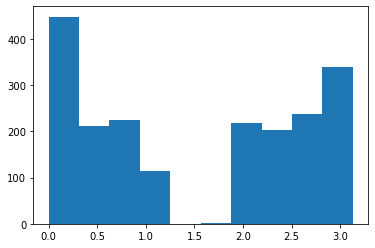

In [129]:
plt.hist(np.linalg.eigvals(A))